In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_price.csv")

## Q1. Perform basic EDA 

In [50]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [52]:
df.shape

(13200, 7)

In [53]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13195    False
13196    False
13197    False
13198    False
13199     True
Length: 13200, dtype: bool

In [54]:
df.duplicated().sum()

np.int64(1049)

In [55]:
df = df.drop_duplicates()

In [56]:
df.shape

(12151, 7)

In [57]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13198
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12151 non-null  object 
 1   size            12151 non-null  object 
 2   total_sqft      12151 non-null  float64
 3   bath            12151 non-null  float64
 4   price           12151 non-null  float64
 5   bhk             12151 non-null  int64  
 6   price_per_sqft  12151 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 759.4+ KB


# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

### a) Mean and Standard deviation

In [59]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


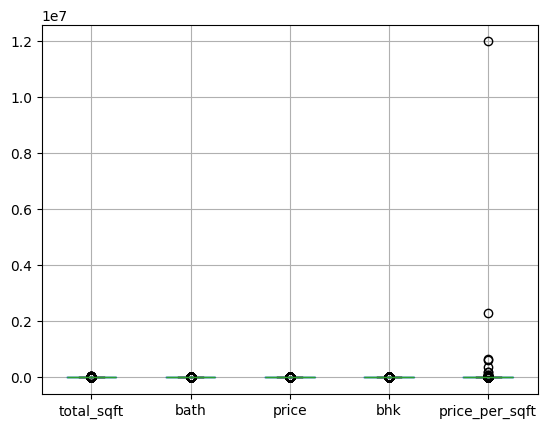

In [60]:
df.boxplot()
plt.show()

In [61]:
df.select_dtypes(include=["number"]).skew().sort_values(ascending=True)

bath                4.214944
bhk                 4.838129
price               7.915103
total_sqft         15.112123
price_per_sqft    103.902032
dtype: float64

In [62]:


def rem_outliers(df, columns):

    df1 = df.copy()

    for col in columns:
        
        upper_limit = df[col].mean() + 2 * df[col].std()    
        lower_limit = df[col].mean() - 2 * df[col].std()
      
    # To remove oulliers
        df1 = df1[(df1[col] <= upper_limit) & (df1[col] >= lower_limit)]

    return df1

columns = df.select_dtypes(include=["number"]).columns

df_without_outliers = rem_outliers(df, columns)
df_without_outliers  

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111


In [63]:
df_without_outliers.select_dtypes(include=["number"]).skew().sort_values(ascending=True)

bhk                0.542181
bath               0.949817
total_sqft         1.627082
price              2.112825
price_per_sqft    14.356624
dtype: float64

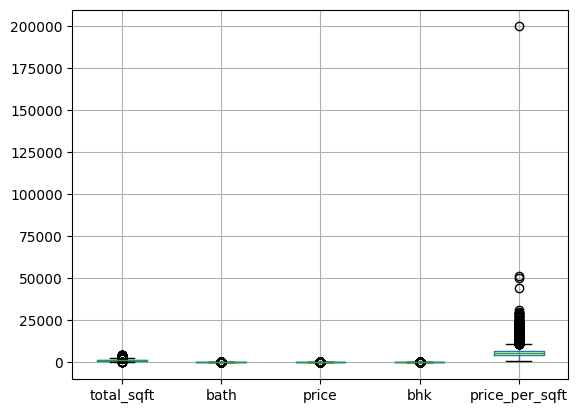

In [64]:
df_without_outliers.boxplot()
plt.show()

In [65]:
df_without_outliers.shape

(11173, 7)

### b) Percentile method

In [66]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


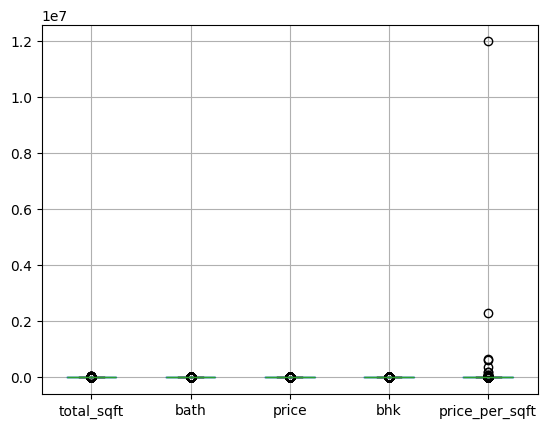

In [67]:
df.boxplot()
plt.show()

In [68]:
df.select_dtypes(include=["number"]).skew().sort_values(ascending=True)

bath                4.214944
bhk                 4.838129
price               7.915103
total_sqft         15.112123
price_per_sqft    103.902032
dtype: float64

In [69]:

def percentile(df, columns):

    df1 = df.copy()

    for col in columns:
        
        upper_limit = df[col].quantile(0.95)
        lower_limit = df[col].quantile(0.05)
      
    # To remove oulliers
        df1 = df1[(df1[col] <= upper_limit) & (df1[col] >= lower_limit)]

    return df1

columns = df.select_dtypes(include=["number"]).columns

df_without_outliers = percentile(df, columns)
df_without_outliers 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13189,Yeshwanthpur,3 BHK,1675.0,3.0,92.13,3,5500
13190,Rachenahalli,2 BHK,1050.0,2.0,52.71,2,5020
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530


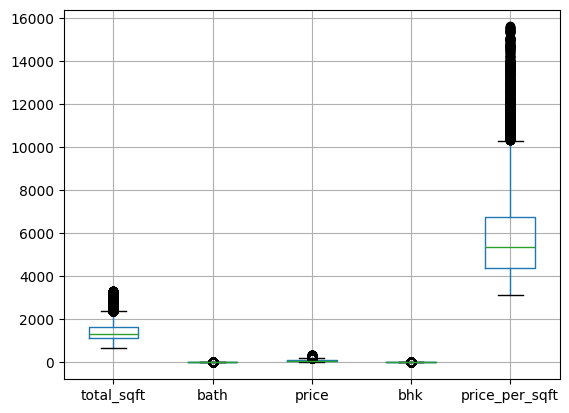

In [70]:
df_without_outliers.boxplot()
plt.show()

In [71]:
df_without_outliers.select_dtypes(include=["number"]).skew().sort_values(ascending=True)

bhk               0.971621
bath              1.303076
total_sqft        1.481774
price_per_sqft    1.623269
price             1.884528
dtype: float64

### c) IQR(Inter quartile range method)

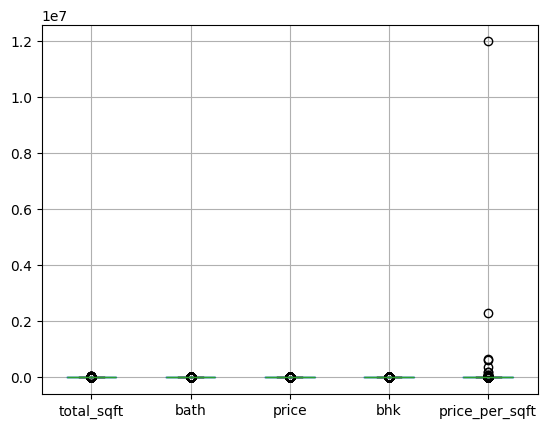

In [72]:
df.boxplot()
plt.show()

In [73]:
df.select_dtypes(include=["number"]).skew().sort_values(ascending=True)

bath                4.214944
bhk                 4.838129
price               7.915103
total_sqft         15.112123
price_per_sqft    103.902032
dtype: float64

In [74]:
def iqr(df, columns):

    df1 = df.copy()

    for col in columns:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1
        
        upper_limit = q3 + 1.5 * iqr
        # print(col, upper_limit)
        lower_limit = q3 - 1.5 * iqr
        # print(col, lower_limit)
    
        # Capping method to remove oulliers
        df1[col] = df1[col].clip(lower_limit, upper_limit)

    return df1

columns = df.select_dtypes(include=["number"]).columns

df_without_outliers = iqr(df, columns)
df_without_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,4.5,120.00,4.0,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3.0,6530.0
13195,Whitefield,5 Bedroom,2600.0,4.0,231.00,4.5,6689.0
13196,other,4 BHK,2600.0,4.5,233.75,4.0,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.0


In [75]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [76]:
df_without_outliers.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000
mean,1456.745251,2.619167,95.731767,2.727718,6297.569871
std,523.478607,0.885361,62.050904,0.841413,2708.118486
min,800.000000,1.500000,13.250000,1.500000,2737.500000
25%,1100.000000,2.000000,50.000000,2.000000,4312.000000
50%,1290.000000,2.000000,74.000000,3.000000,5500.000000
75%,1700.000000,3.000000,123.500000,3.000000,7461.000000
max,2600.000000,4.500000,233.750000,4.500000,12184.500000


In [77]:
df_without_outliers.select_dtypes(include=["number"]).skew().sort_values(ascending=True)

bhk               0.604409
bath              0.882973
total_sqft        0.966286
price_per_sqft    0.999581
price             1.121804
dtype: float64

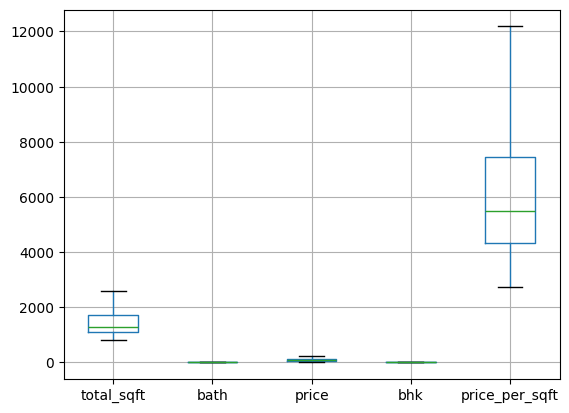

In [78]:
df_without_outliers.boxplot()
plt.show()

### d) Z Score method

In [79]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12151.000000,12151.000000,12151.000000,12151.000000,1.215100e+04
mean,1574.846013,2.719941,115.471328,2.827504,8.132642e+03
std,1277.328354,1.372210,154.094133,1.326540,1.112329e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.312000e+03
50%,1290.000000,2.000000,74.000000,3.000000,5.500000e+03
75%,1700.000000,3.000000,123.500000,3.000000,7.461000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


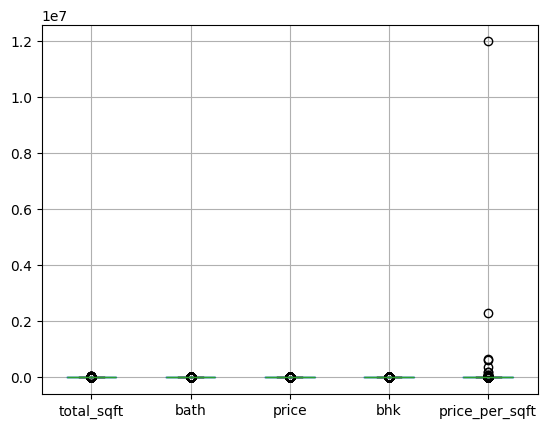

In [80]:
df.boxplot()
plt.show()

In [81]:
df.select_dtypes(include=["number"]).skew().sort_values(ascending=True)

bath                4.214944
bhk                 4.838129
price               7.915103
total_sqft         15.112123
price_per_sqft    103.902032
dtype: float64

In [82]:


def zscore(df, columns):

    df1 = df.copy()

    for col in columns:


        df1["Zscore"] = (df[col] - df[col].mean()) / df[col].std()
        
        # To remove oulliers
        df1 = df1[(df1["Zscore"] <= 0.5) & (df1["Zscore"] >= -0.5)]
        
    return df1

columns = df.select_dtypes(include=["number"]).columns

df_without_outliers = zscore(df, columns)
df_without_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828,-0.029709
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.00,3,4067,-0.036551
17,Raja Rajeshwari Nagar,3 BHK,1540.0,3.0,60.00,3,3896,-0.038088
21,Binny Pete,3 BHK,1755.0,3.0,122.00,3,6951,-0.010623
...,...,...,...,...,...,...,...,...
13181,Kothanur,3 BHK,1454.0,3.0,71.50,3,4917,-0.028909
13187,Billekahalli,3 BHK,1805.0,3.0,134.00,3,7423,-0.006380
13188,Bannerghatta Road,3 BHK,1527.0,3.0,142.00,3,9299,0.010486
13189,Yeshwanthpur,3 BHK,1675.0,3.0,92.13,3,5500,-0.023668


In [83]:
df_without_outliers.select_dtypes(include=["number"]).skew().sort_values(ascending=True)

total_sqft       -0.095224
bath              0.000000
bhk               0.000000
price             0.569931
Zscore            1.330971
price_per_sqft    1.330971
dtype: float64

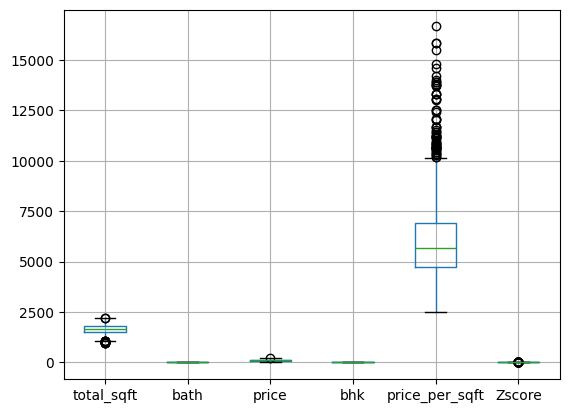

In [84]:
df_without_outliers.boxplot()
plt.show()

# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation

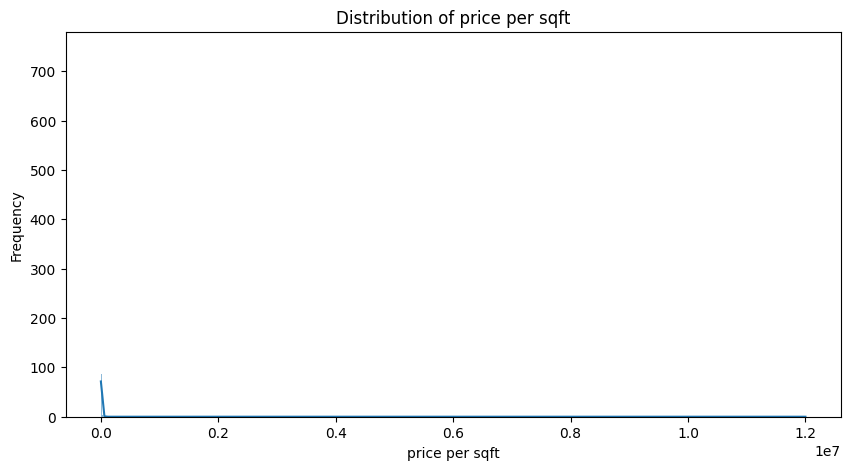

In [85]:

plt.figure(figsize=(10, 5))
sns.histplot(df["price_per_sqft"], kde=True)
plt.title("Distribution of price per sqft")
plt.xlabel("price per sqft")
plt.ylabel("Frequency")
plt.show()

In [86]:
skewness = df["price_per_sqft"].skew()
print("skewness : ", skewness)
kurtosis = df["price_per_sqft"].kurtosis()
print("kurtosis : ", kurtosis)

skewness :  103.90203228991889
kurtosis :  11135.81306761006


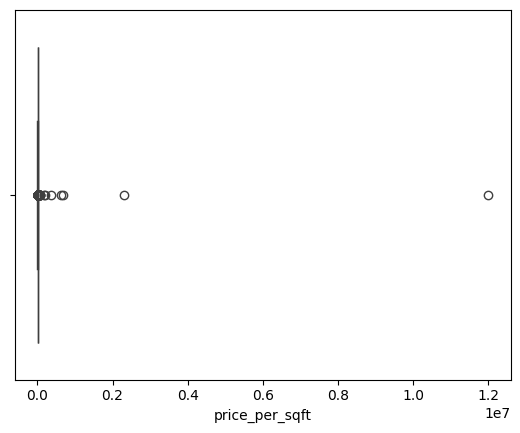

In [87]:
sns.boxplot(df["price_per_sqft"], orient="h")
plt.show()

In [93]:
df1 = df.copy()
df1["log_price_per_sqft"] = np.log1p(df["price_per_sqft"])
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,8.216088
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,8.437284
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,8.367765
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,8.739697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,8.354910
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,8.784315
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,8.808369
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,9.315781
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,8.567696


In [89]:
log_skewness = df1["log_price_per_sqft"].skew()
print("log_skewness : ", log_skewness)
log_kurtosis = df1["log_price_per_sqft"].kurtosis()
print("log_kurtosis : ", log_kurtosis)

log_skewness :  1.4010433144111638
log_kurtosis :  9.408799464773505


<Figure size 1000x500 with 0 Axes>

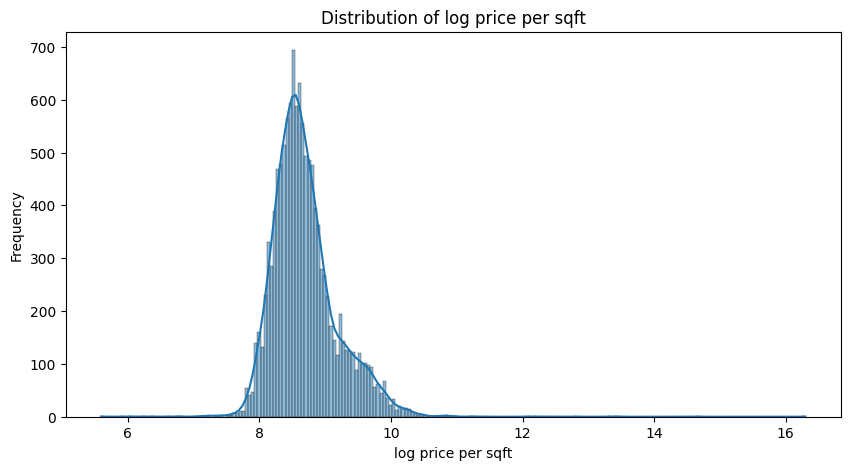

In [94]:
plt.figure(figsize=(10, 5))
sns.histplot(df1["log_price_per_sqft"], kde=True)
plt.title("Distribution of log price per sqft")
plt.xlabel("log price per sqft")
plt.ylabel("Frequency")
plt.show()

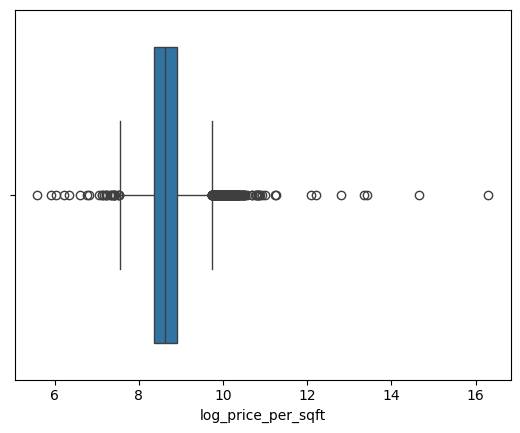

In [96]:
sns.boxplot(df1["log_price_per_sqft"], orient="h")
plt.show()

# Q5. Check the correlation between all the numerical columns and plot heatmap.

In [125]:
df.select_dtypes(include=["number"]).corr()

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,-0.008877
bath,0.386694,1.000000,0.448802,0.898875,0.030133
price,0.572516,0.448802,1.000000,0.390008,0.027415
bhk,0.339936,0.898875,0.390008,1.000000,0.030294
price_per_sqft,-0.008877,0.030133,0.027415,0.030294,1.000000


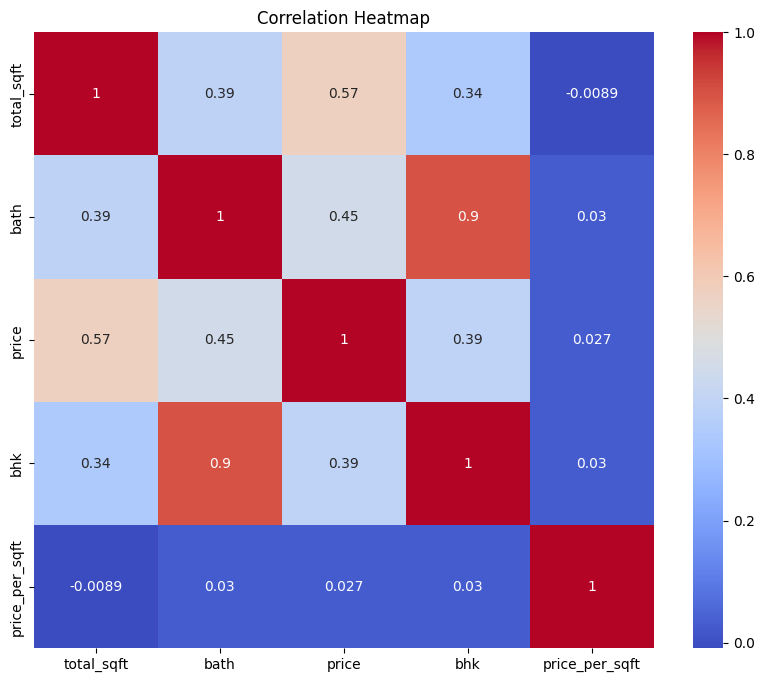

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Q6. Draw Scatter plot between the variables to check the correlation between them.

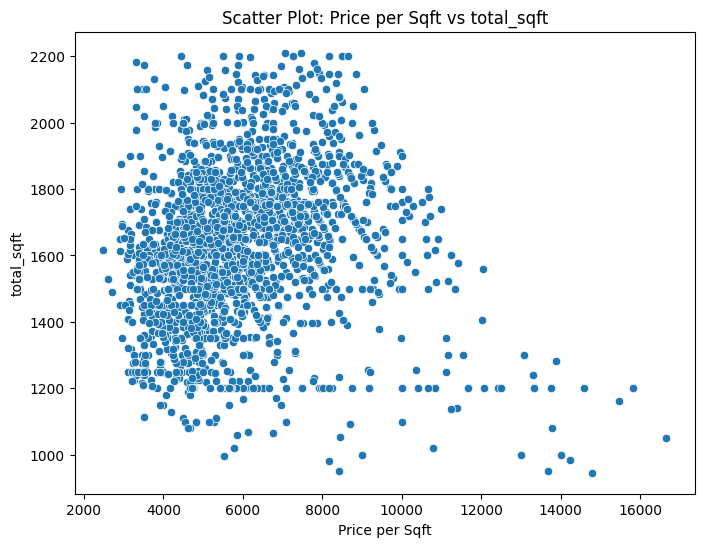

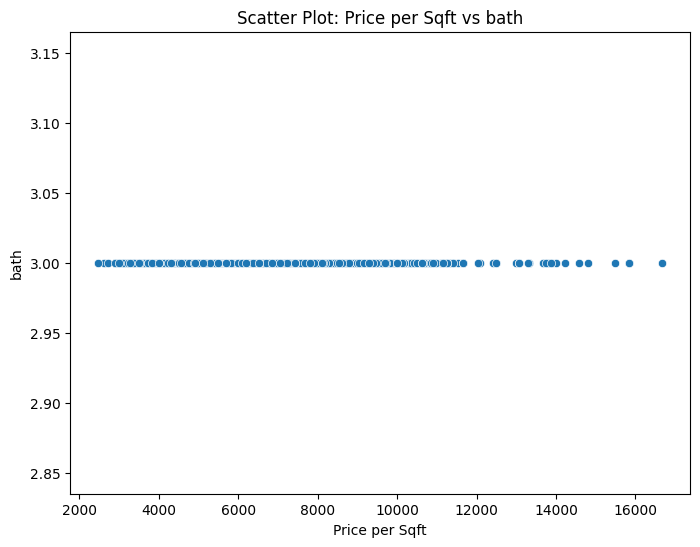

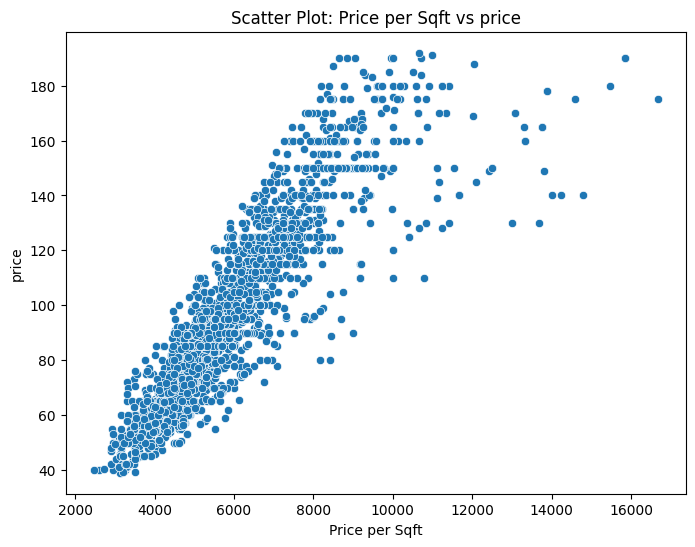

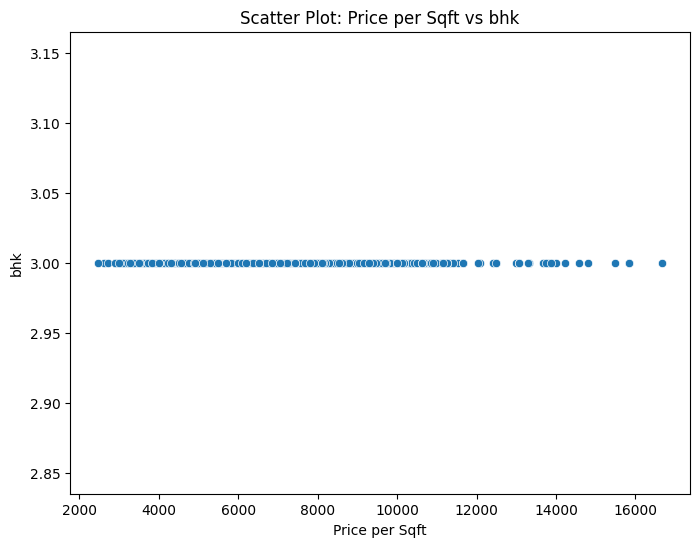

In [127]:


for col in ["total_sqft", "bath", "price", "bhk"]:

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_without_outliers["price_per_sqft"], y=df_without_outliers[col])
    
    plt.title("Scatter Plot: Price per Sqft vs " + col)
    plt.xlabel("Price per Sqft")
    plt.ylabel(col)
    
    plt.show()